<a href="https://colab.research.google.com/github/HMendesDev/Data-Science/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import shapiro
from sklearn.metrics import adjusted_rand_score

# Carregando os dados

In [ ]:
arq = "/content/drive/MyDrive/Data Science/Agrupamento/Iris Data Set.csv"

In [ ]:
df =  pd.read_csv(arq, sep=",")

Visualizando os dados

In [ ]:
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Limpeza e Transformação

Verificando as informações do nosso dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1    sepal_width_in_cm  150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Quantidade de linhas em nosso dataset:

In [ ]:
df.shape[0]

150

Quantidade de registros em nosso dataset:

In [ ]:
df.shape[0] * df.shape[1]

750

Verificando linhas duplicadas:

In [ ]:
df[df.duplicated()]

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Removendo duplicadas:

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df.duplicated()]

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class


Verificando registros nulos:

In [ ]:
df.isnull().sum()

,0
sepal_length_in_cm,0
sepal_width_in_cm,0
petal_length_in_cm,0
petal_width_in_cm,0
class,0


Removendo espaços dos nomes das colunas:

In [ ]:
list(df.columns)

['sepal_length_in_cm',
 ' sepal_width_in_cm',
 'petal_length_in_cm',
 'petal_width_in_cm',
 'class ']

In [ ]:
df.columns = [col.strip() for col in df.columns]
list(df.columns)

['sepal_length_in_cm',
 'sepal_width_in_cm',
 'petal_length_in_cm',
 'petal_width_in_cm',
 'class']

# Análise Exploratória

Medidas descritivas das variáveis:

In [ ]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
list(df.columns)

['sepal_length_in_cm',
 'sepal_width_in_cm',
 'petal_length_in_cm',
 'petal_width_in_cm',
 'class']

In [ ]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

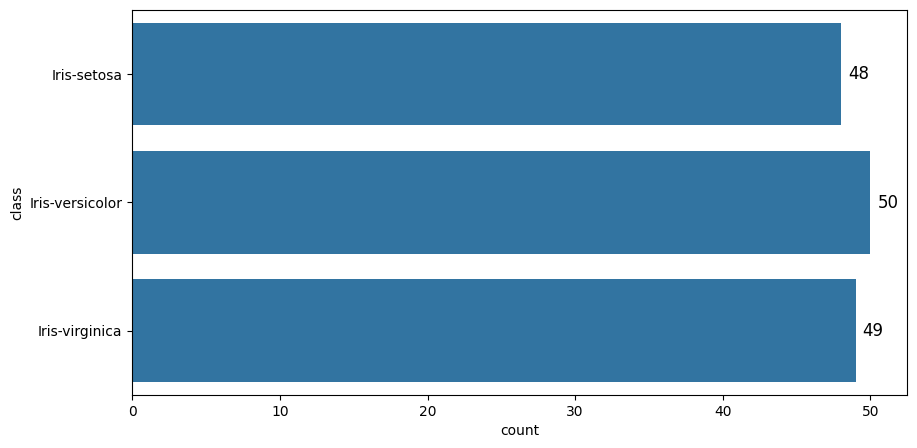

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["class"])
ax.bar_label(ax.containers[0], fontsize = 12, color="black", padding=5)
plt.show()

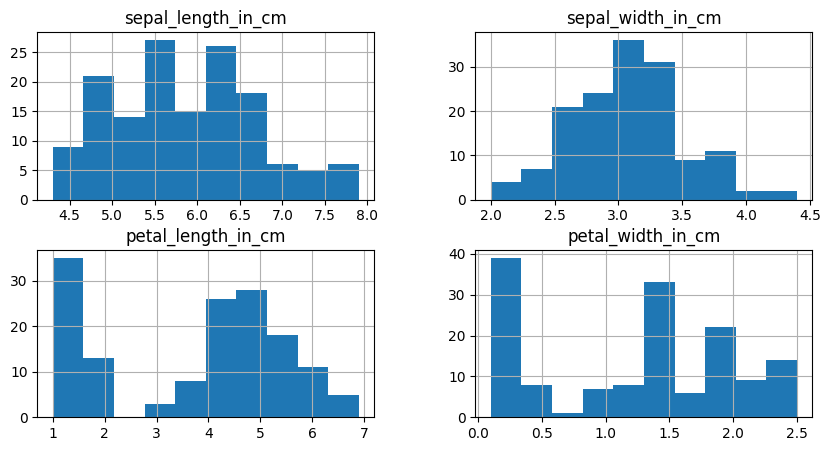

In [ ]:
df.hist(figsize=(10,5)) #Verificando a distribuição dos dados nas variáveis númericas
plt.show()

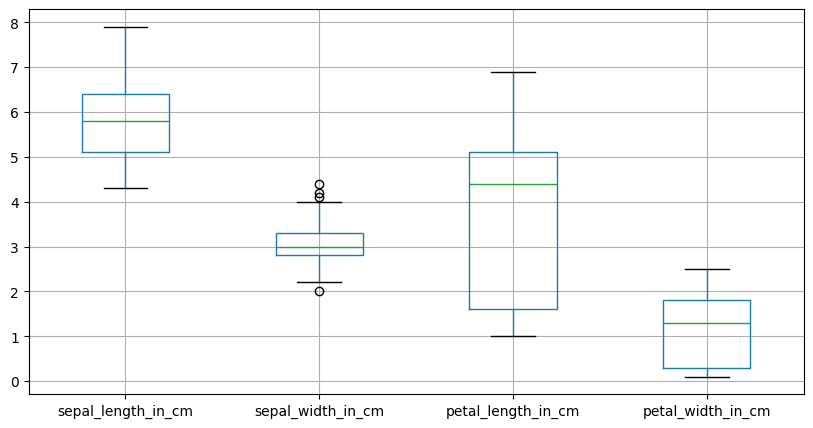

In [ ]:
df.boxplot(figsize=(10,5)) #Verificando outliers das variáveis númericas
plt.show()

Removendo outliers pois o algoritmo KMeans é sensível a valores extremos:

In [ ]:
IC = df["sepal_width_in_cm"].quantile(0.75) - df["sepal_width_in_cm"].quantile(0.25) #Calculando o Interquartil
limite_superior = df["sepal_width_in_cm"].quantile(0.75) + (1.5 * IC) #Formula para limite superior
limite_inferior =  df["sepal_width_in_cm"].quantile(0.25) - (1.5 * IC) #Formula para limite inferior

In [ ]:
outliers_remover = df[(df["sepal_width_in_cm"] > limite_superior) | (df["sepal_width_in_cm"] < limite_inferior)].index #Pegando os indices para remover

In [ ]:
df.drop(outliers_remover,inplace=True) #Removendo os outliers

Verificando box plot após remoção:

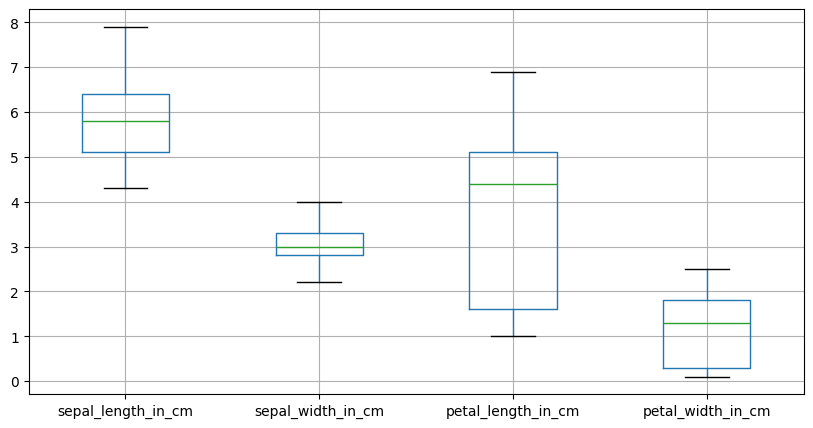

In [ ]:
df.boxplot(figsize=(10,5))
plt.show()

# Modelo KMeans

Como estamos lidando com 4 variáveis (4 dimensões) não conseguimos visualizar previamente os grupos dos dados, portanto conseguimos ver de duas em duas variáveis.

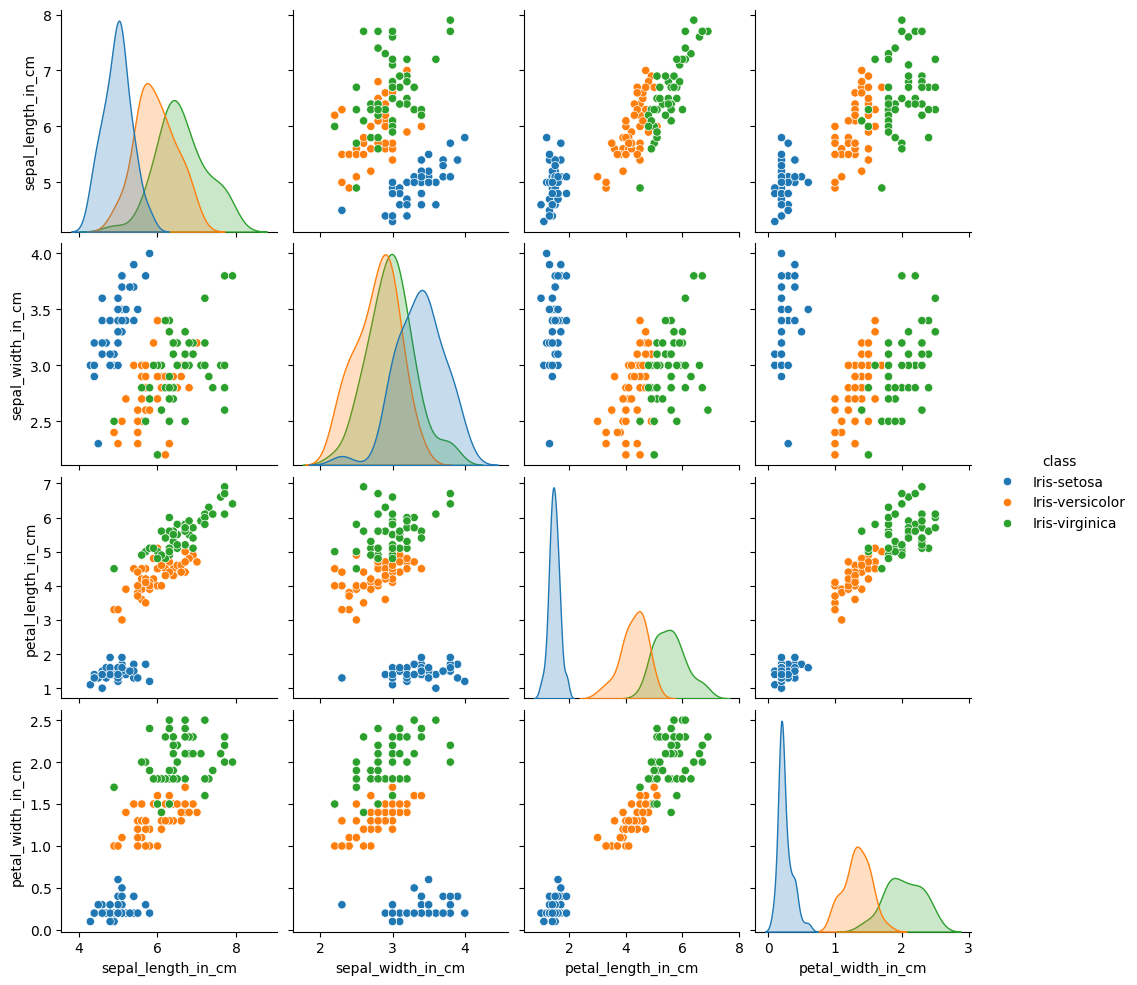

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

Normalizando os dados (Pré Processamento):

In [ ]:
processing = StandardScaler()

In [ ]:
X = processing.fit_transform(df.select_dtypes(include=np.number))

Encontrando o melhor número de cluster:

In [ ]:
valores_k = []
inercia = []

for i in range(1,15,1):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X)
  valores_k.append(i)
  inercia.append(kmeans.inertia_)

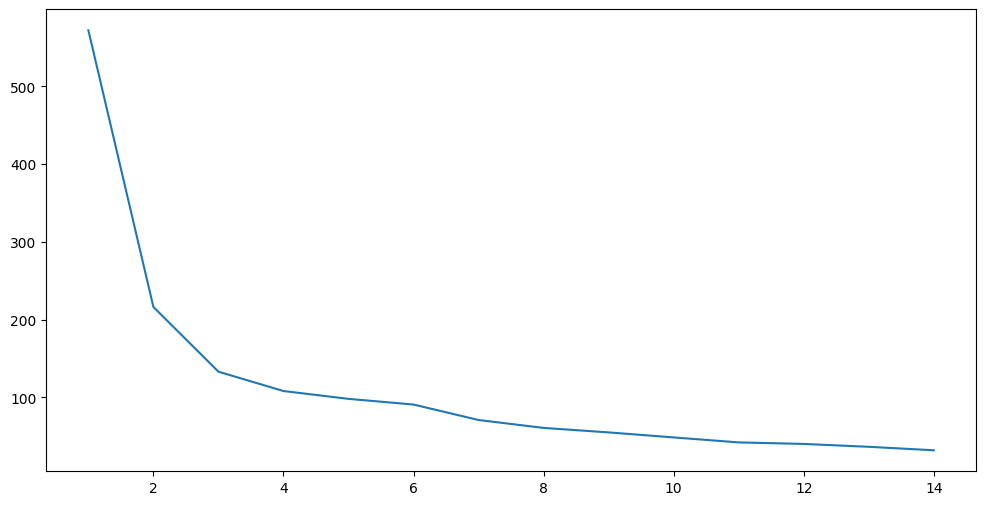

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(valores_k, inercia)
plt.show()

Melhor quantidade de cluster foram 2 e 3, vamos fazer um modelo de cada

In [ ]:
kmeans2 = KMeans(n_clusters=2,init="k-means++",random_state=0).fit(X) #Treinando o modelo com 2 cluster
kmeans3 = KMeans(n_clusters=3,init="k-means++",random_state=0).fit(X) #Treinando o modelo com 3 cluster

In [ ]:
predict_kmeans2 = kmeans2.predict(X)
predict_kmeans3 = kmeans3.predict(X)

In [ ]:
df["cluster2"] = predict_kmeans2
df["cluster3"] = predict_kmeans3

In [ ]:
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class,cluster2,cluster3
0,5.1,3.5,1.4,0.2,Iris-setosa,0,2
1,4.9,3.0,1.4,0.2,Iris-setosa,0,2
2,4.7,3.2,1.3,0.2,Iris-setosa,0,2
3,4.6,3.1,1.5,0.2,Iris-setosa,0,2
4,5.0,3.6,1.4,0.2,Iris-setosa,0,2
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1,0
147,6.5,3.0,5.2,2.0,Iris-virginica,1,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1,1


Calculando a metrica ARI (Adjusted Rand Index) para os nossos modelos

In [ ]:
ari_score2 = adjusted_rand_score(df["class"], df["cluster2"])
print("Adjusted Rand Score:", ari_score2)

Adjusted Rand Score: 0.5473419485977524


In [ ]:
ari_score3 = adjusted_rand_score(df["class"], df["cluster3"])
print("Adjusted Rand Score:", ari_score3)

Adjusted Rand Score: 0.583011826970238


In [ ]:
df["class"].value_counts()

,count
class,
Iris-versicolor,49
Iris-virginica,49
Iris-setosa,45


In [ ]:
df["cluster3"].value_counts()

,count
cluster3,
0,53
2,45
1,45


Criando vários modelos e avaliando com a metrica ARI

In [37]:
ARI = []
valores_k1 = []

for i in range(1,15,1):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X)
  label = kmeans.predict(X)
  ARI.append(adjusted_rand_score(df["class"], label))
  valores_k1.append(i)

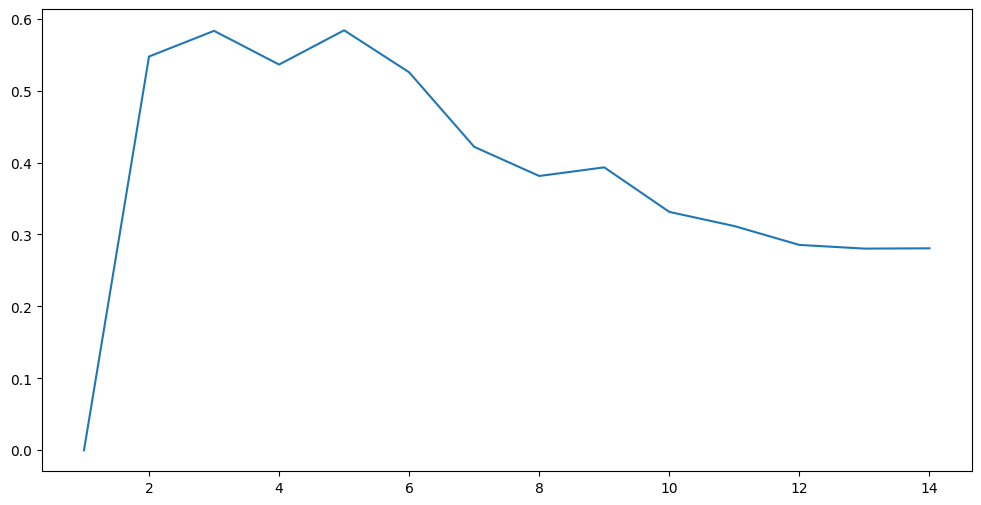

In [38]:
plt.figure(figsize=(12,6))
plt.plot(valores_k1, ARI)
plt.show()